In [1]:
import pandas as pd
import random
import os
import subprocess
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sputnik_data/dlmc/dlmc.csv")
df = df[df['model'] == 'rn50']
df

,model,quality,path,name,nrows,ncols,nnz,mean_nnz_per_row,std_nnz_per_row,mean_nnz_per_col,std_nnz_per_col,sparsity
2716,rn50,74.59,dlmc/rn50/random_pruning/0.5/bottleneck_1_bloc...,rn50/random_pruning/0.5/bottleneck_1_block_gro...,64,64,2048.0,32.000000,3.766630,32.000000,5.153882,0.50000
2717,rn50,74.59,dlmc/rn50/random_pruning/0.5/final_dense.smtx,rn50/random_pruning/0.5/final_dense,1000,2048,1024000.0,1024.000000,22.633957,500.000000,20.867935,0.50000
2718,rn50,74.59,dlmc/rn50/random_pruning/0.5/bottleneck_2_bloc...,rn50/random_pruning/0.5/bottleneck_2_block_gro...,512,4608,1179648.0,2304.000000,34.984203,256.000000,14.925931,0.50000
2719,rn50,74.59,dlmc/rn50/random_pruning/0.5/bottleneck_1_bloc...,rn50/random_pruning/0.5/bottleneck_1_block_gro...,256,1024,131072.0,512.000000,15.905482,128.000000,10.774319,0.50000
2720,rn50,74.59,dlmc/rn50/random_pruning/0.5/bottleneck_projec...,rn50/random_pruning/0.5/bottleneck_projection_...,1024,512,262144.0,256.000000,11.287265,512.000000,19.653442,0.50000
...,...,...,...,...,...,...,...,...,...,...,...,...
3841,rn50,69.26,dlmc/rn50/extended_magnitude_pruning/0.98/bott...,rn50/extended_magnitude_pruning/0.98/bottlenec...,1024,256,5243.0,5.120117,4.505013,20.480469,13.208647,0.98000
3842,rn50,69.26,dlmc/rn50/extended_magnitude_pruning/0.98/bott...,rn50/extended_magnitude_pruning/0.98/bottlenec...,1024,256,5243.0,5.120117,5.118920,20.480469,9.954173,0.98000
3843,rn50,69.26,dlmc/rn50/extended_magnitude_pruning/0.98/bott...,rn50/extended_magnitude_pruning/0.98/bottlenec...,256,64,328.0,1.281250,1.853786,5.125000,3.099899,0.97998
3844,rn50,69.26,dlmc/rn50/extended_magnitude_pruning/0.98/bott...,rn50/extended_magnitude_pruning/0.98/bottlenec...,512,2048,20972.0,40.960938,8.711883,10.240234,6.427093,0.98000


In [3]:
def convert_smtx(filename):
    # print(f"Processing {filename}")
    fp = open(filename, "r")
    lines = fp.readlines()
    fp.close()
    
    nrows, ncols, nnz = tuple(map(int, lines[0].split(",")))
    row_ptrs = list(map(int, lines[1].strip().split(" ")))
    col_idxs = list(map(int, lines[2].strip().split(" ")))
    
    outfile = open(filename.replace(".smtx", ".mtx"), "w")
    outfile.write("%%MatrixMarket matrix coordinate real general\n")
    outfile.write(f"{nrows} {ncols} {nnz}\n")
    
    for i in range(nrows):
        for j_idx in range(row_ptrs[i], row_ptrs[i+1]):
            j = col_idxs[j_idx]
            val = random.randint(0, 32)
            outfile.write(f"{i+1} {j+1} {val}\n")
            
    outfile.close()

In [4]:
matrices = df['path'].tolist()
for filename in tqdm(matrices):
    convert_smtx("sputnik_data/" + filename)

  0%|          | 0/1130 [00:00<?, ?it/s]

In [5]:
fp = open("sputnik_data/dlmc/rn50_batchsizes.txt", "r")
batch_sizes = dict()
for l in fp.readlines():
    batch_sizes[l.split(",")[0]] = int(l.split(",")[1])
print(batch_sizes)

{'bottleneck_3_block_group1_2_1': 3136, 'bottleneck_1_block_group1_1_1': 3136, 'bottleneck_3_block_group3_5_1': 196, 'bottleneck_3_block_group_projection_block_group1': 3136, 'bottleneck_1_block_group3_3_1': 196, 'bottleneck_3_block_group_projection_block_group3': 196, 'bottleneck_3_block_group_projection_block_group2': 784, 'bottleneck_3_block_group_projection_block_group4': 49, 'bottleneck_projection_block_group_projection_block_group4': 49, 'bottleneck_1_block_group3_5_1': 196, 'bottleneck_projection_block_group_projection_block_group2': 784, 'bottleneck_projection_block_group_projection_block_group3': 196, 'bottleneck_3_block_group2_3_1': 784, 'bottleneck_3_block_group3_3_1': 196, 'bottleneck_1_block_group2_1_1': 784, 'bottleneck_3_block_group2_1_1': 784, 'bottleneck_3_block_group3_1_1': 196, 'bottleneck_2_block_group4_2_1': 49, 'bottleneck_1_block_group2_3_1': 784, 'bottleneck_2_block_group2_3_1': 784, 'bottleneck_projection_block_group_projection_block_group1': 3136, 'bottleneck_

In [6]:
bin_path = "ppopp19_ae/ASpT_SpMM_GPU/sspmm_32"
measurements = []
for filename in tqdm(matrices):
    filename = filename.replace(".smtx", ".mtx")
    bs = batch_sizes[os.path.basename(filename)[:-4]]
    ret = subprocess.run([bin_path, "sputnik_data/" + filename, str(bs)], capture_output=True)
    stderr = ret.stderr.decode("ascii").strip().split("\n")
    
    # print(stderr)
    preproc_ms = float(stderr[0][len("preproc: "):])
    work_ms = float(stderr[1][len("work: "):])
    
    measurements.append((filename, preproc_ms, work_ms))
    # print(preproc_ms, work_ms)
    
df = pd.DataFrame.from_records(measurements, columns=['filename', 'preproc_ms', 'work_ms'])
df.to_csv("measurements.csv")
df

  0%|          | 0/1130 [00:00<?, ?it/s]

,filename,preproc_ms,work_ms
0,dlmc/rn50/random_pruning/0.5/bottleneck_1_bloc...,0.038912,0.008384
1,dlmc/rn50/random_pruning/0.5/final_dense.mtx,3.226848,0.151936
2,dlmc/rn50/random_pruning/0.5/bottleneck_2_bloc...,5.507232,0.163104
3,dlmc/rn50/random_pruning/0.5/bottleneck_1_bloc...,1.215200,0.082496
4,dlmc/rn50/random_pruning/0.5/bottleneck_projec...,1.313984,0.084256
...,...,...,...
1125,dlmc/rn50/extended_magnitude_pruning/0.98/bott...,0.026624,0.014208
1126,dlmc/rn50/extended_magnitude_pruning/0.98/bott...,0.026720,0.014080
1127,dlmc/rn50/extended_magnitude_pruning/0.98/bott...,0.028288,0.013920
1128,dlmc/rn50/extended_magnitude_pruning/0.98/bott...,0.035872,0.014016


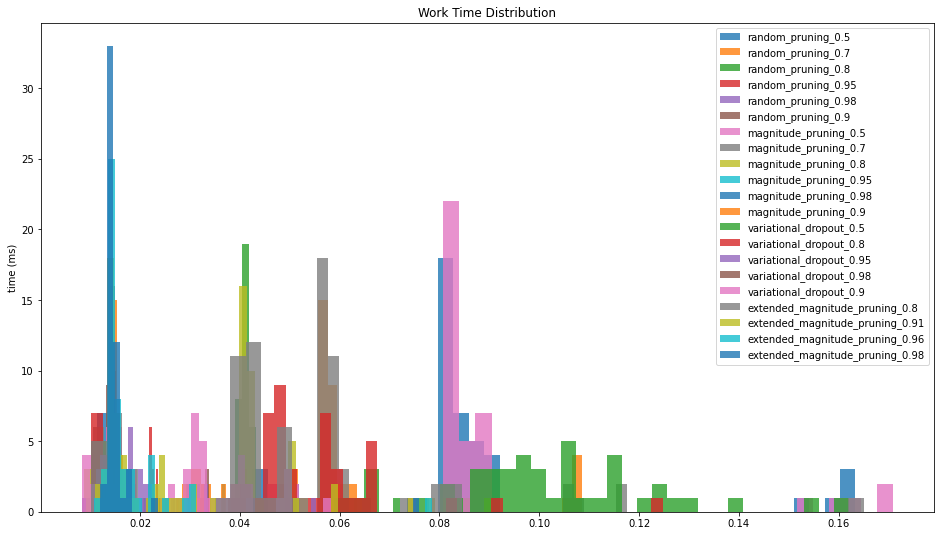

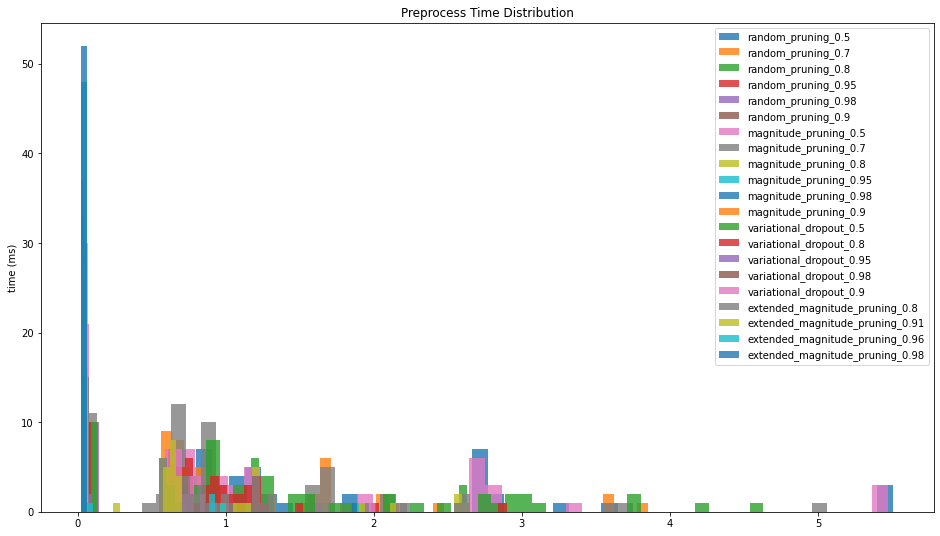

In [8]:
preproc_time = dict()
work_time = dict()

for idx, row in df.iterrows():
    tokens = row['filename'].split("/")
    pruning_methods = tokens[2]
    pruning_rate = float(tokens[3])
    group_name = f"{pruning_methods}_{pruning_rate}"
    
    if group_name not in preproc_time: preproc_time[group_name] = []
    if group_name not in work_time: work_time[group_name] = []
    
    preproc_time[group_name].append(row['preproc_ms'])
    work_time[group_name].append(row['work_ms'])

plt.figure(figsize=(16,9))
plt.title("Work Time Distribution")
plt.ylabel("time (ms)")
for group in preproc_time:
    plt.hist(work_time[group], bins=50, label=group, alpha=0.8)
plt.legend()

plt.figure(figsize=(16,9))
plt.title("Preprocess Time Distribution")
plt.ylabel("time (ms)")
for group in preproc_time:
    plt.hist(preproc_time[group], bins=50, label=group, alpha=0.8)
plt.legend()

plt.show()

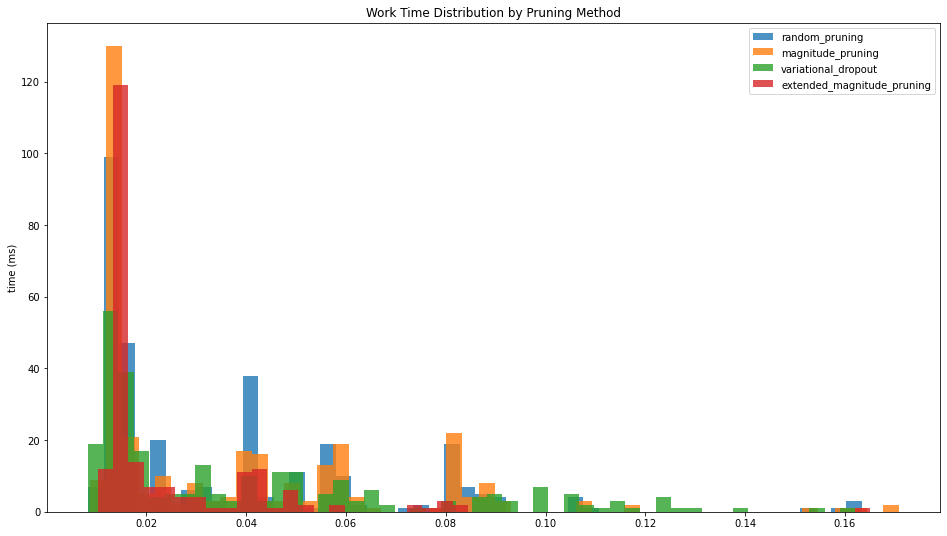

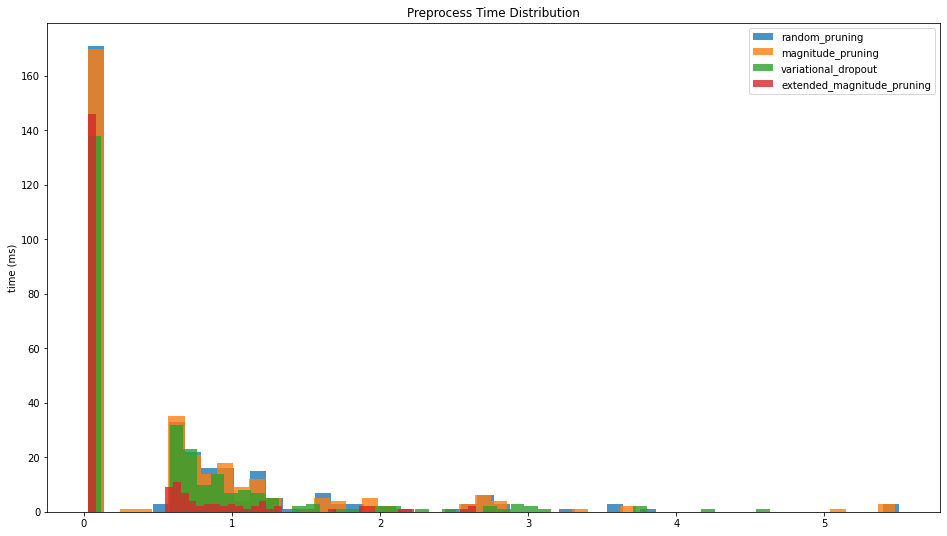

In [17]:
preproc_time = dict()
work_time = dict()

for idx, row in df.iterrows():
    tokens = row['filename'].split("/")
    pruning_methods = tokens[2]
    pruning_rate = float(tokens[3])
    #group_name = f"{pruning_methods}_{pruning_rate}"
    group_name = pruning_methods
    
    if group_name not in preproc_time: preproc_time[group_name] = []
    if group_name not in work_time: work_time[group_name] = []
    
    preproc_time[group_name].append(row['preproc_ms'])
    work_time[group_name].append(row['work_ms'])

plt.figure(figsize=(16,9))
plt.title("Work Time Distribution by Pruning Method")
plt.ylabel("time (ms)")
for group in preproc_time:
    plt.hist(work_time[group], bins=50, label=group, alpha=0.8)
plt.legend()

plt.figure(figsize=(16,9))
plt.title("Preprocess Time Distribution")
plt.ylabel("time (ms)")
for group in preproc_time:
    plt.hist(preproc_time[group], bins=50, label=group, alpha=0.8)
plt.legend()

plt.show()

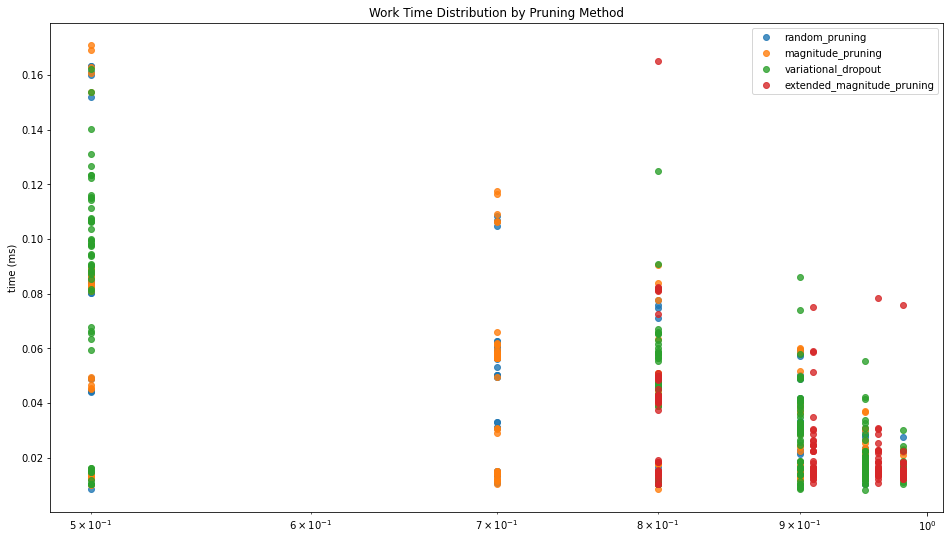

In [15]:
work_time_x = dict()
work_time_y = dict()

for idx, row in df.iterrows():
    tokens = row['filename'].split("/")
    pruning_methods = tokens[2]
    pruning_rate = float(tokens[3])
    
    if pruning_methods not in work_time_x: work_time_x[pruning_methods] = []
    if pruning_methods not in work_time_y: work_time_y[pruning_methods] = []
    
    work_time_x[pruning_methods].append(pruning_rate)
    work_time_y[pruning_methods].append(row['work_ms'])

plt.figure(figsize=(16,9))
plt.title("Work Time Distribution by Pruning Method")
plt.ylabel("time (ms)")
plt.xscale("log")
for group in work_time_x:
    plt.scatter(work_time_x[group], work_time_y[group], label=group, alpha=0.8)
plt.legend()

plt.show()